# Signal Reconstruction

**Mauricio de Oliveira**

*September, 2019*

Under certain conditions (see notebook on Aliasing) it is possible to *exactly* reconstruct a continuous signal from its samples. This is what you will explore in the notebook.

## Load some libraries

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import IPython.display as ipd

Generate a sinusoidal tone at f1 = 3Hz, x1, with a duration of T = 10s sampled at fs1 = 1000Hz sampling rate. This sampling rate is significantly higher than the frequency of the tone, which will make it appear smooth. Use $\cos$ to generate the waveform.

In [39]:
T = 10.0

fs1 = 1000
t_1000 = np.arange(0, T, 1/fs1)

f1 = 3.0
A1 = .8
phi1 = np.pi*35/180

x1_1000 = A1*np.cos(2*np.pi*f1*t_1000+phi1)

Repeat with fs2 = 10Hz as the sampling rate and compare the two sets of samples. This choice is such that f1 = 3Hz is below the Nyquist frequency (see notebook on Aliasing)

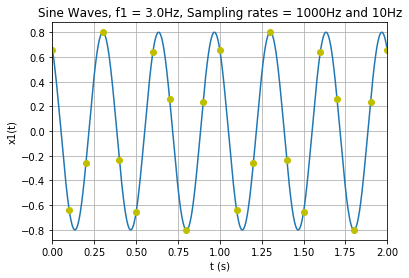

In [40]:
fs2 = 10
t_10 = np.arange(0, T, 1/fs2)

x1_10 = A1*np.cos(2*np.pi*f1*t_10+phi1)

plt.plot(t_1000, x1_1000, '-', t_10, x1_10, 'yo')
plt.title('Sine Waves, f1 = {0}Hz, Sampling rates = {1}Hz and {2}Hz'.format(f1,fs1,fs2));
plt.xlabel('t (s)');
plt.ylabel('x1(t)');
plt.xlim(0,2)
plt.grid(1)

Plot only the samples at fs2 = 10Hz to see how they *do not* immediately suggest this is a sinusoidal signal!

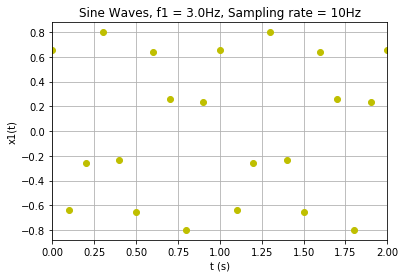

In [41]:
plt.plot(t_10, x1_10, 'yo')
plt.title('Sine Waves, f1 = {0}Hz, Sampling rate = {1}Hz'.format(f1,fs2));
plt.xlabel('t (s)');
plt.ylabel('x1(t)');
plt.xlim(0,2)
plt.grid(1)

In order to *exactly* reconstruct the continuos signal, $x(t)$, from its samples, $x(k T_s)$, where $T_s$ is the sampling period and $k$ is an integer, we can use the following formula:

<center>
$x(t) = \sum_{k = -\infty}^{\infty} x(k T_s) \operatorname{sinc}(t/Ts - k), \qquad \operatorname{sinc}(x) = \displaystyle \frac{\sin{\pi x}}{\pi x},$
</center>

known as *Shannon interpolation formula*.

There are two catches: first the formula adds an infinite number of samples, and second the continuous signal $\operatorname{sinc}(t)$ is of infinite duration. If we use a finite ammount of samples and evaluate the signal $\operatorname{sinc}$ on a finite interval we shall recover the function only approximatelly. In practice this is enough.

This is implemented next as a for loop, where we use the higher sampling rate to emulate the continuous signal $\operatorname{sinc}$:

In [42]:
Ts2 = 1./fs2
x1r_1000 = np.zeros(t_1000.shape)
for k in range(len(x1_10)):
    x1r_1000 = x1r_1000 + x1_10[k] * np.sinc((t_1000-k*Ts2)/Ts2)

We compare the *original* signal with the one reconstructed:

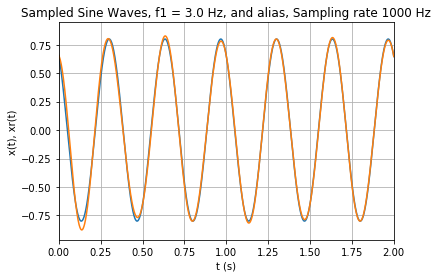

In [43]:
plt.plot(t_1000, x1_1000, '-', t_1000, x1r_1000, '-')
plt.title('Sampled Sine Waves, f1 = {0} Hz, and alias, Sampling rate {1} Hz'.format(f1,fs1));
plt.xlabel('t (s)');
plt.ylabel('x(t), xr(t)');
plt.xlim(0,2)
plt.grid(1)

Not too bad, with a bit of distortion at the edge.

## Rich Signals

The reconstruction process for signals that are rich in higher harmonics is the same as in the case of a single tone. We illustrate it next for a sawtooth waveform. The distortions that occur in the reconstructed signal are not due to the reconstruction but due to alliasing (see Aliasing notebook).

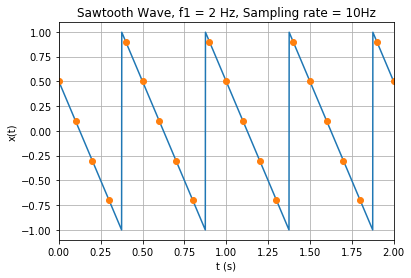

In [44]:
N = 2**16
f2 = 2
x2_1000 = 2*((N*(.75-f2*t_1000) % N)/N - .5)
x2_10 = 2*((N*(.75-f2*t_10) % N)/N - .5)

plt.plot(t_1000, x2_1000, '-', t_10, x2_10, 'o')
plt.title('Sawtooth Wave, f1 = {0} Hz, Sampling rate = {1}Hz'.format(f2,fs2));
plt.xlabel('t (s)');
plt.ylabel('x(t)');
plt.xlim(0,2)
plt.grid(1)

In [45]:
x2r_1000 = np.zeros(t_1000.shape)
for k in range(len(t_10)):
    x2r_1000 = x2r_1000 + x2_10[k] * np.sinc(fs2*t_1000-k)

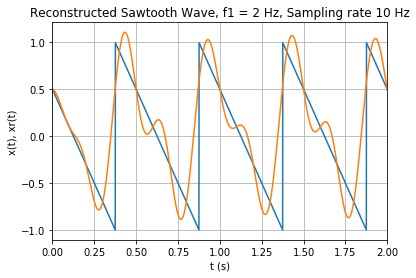

In [46]:
plt.plot(t_1000, x2_1000, '-', t_1000, x2r_1000, '-')
plt.title('Reconstructed Sawtooth Wave, f1 = {0} Hz, Sampling rate {1} Hz'.format(f2,fs2));
plt.xlabel('t (s)');
plt.ylabel('x(t), xr(t)');
plt.xlim(0,2)
plt.grid(1)

In ths case of rich signals the reconstruction is not as good. Besides the issue with the finite approximation of the Shannon formula, the rich signal violates a key assumption required for exact reconstruction: that the original signal be bandlimited. The triangular wave has an infinite number of harmonics.